## Modelado 
### Selección del modelo 
Dada la distribución de datos, se opta por tres metodos de modelado k-means, DBSCAN y AgglomerativeClustering 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
data = pd.read_csv('data/siniestros-bdd-transform.csv', encoding='utf-8', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NUM_FALLECIDO  3023 non-null   float64
 1   NUM_LESIONADO  3023 non-null   float64
 2   PROVINCIA_1    3023 non-null   int64  
 3   PROVINCIA_2    3023 non-null   int64  
 4   PROVINCIA_3    3023 non-null   int64  
 5   PROVINCIA_4    3023 non-null   int64  
 6   PROVINCIA_5    3023 non-null   int64  
 7   PROVINCIA_6    3023 non-null   int64  
 8   PROVINCIA_7    3023 non-null   int64  
 9   PROVINCIA_8    3023 non-null   int64  
 10  PROVINCIA_9    3023 non-null   int64  
 11  PROVINCIA_10   3023 non-null   int64  
 12  PROVINCIA_11   3023 non-null   int64  
 13  PROVINCIA_12   3023 non-null   int64  
 14  PROVINCIA_13   3023 non-null   int64  
 15  PROVINCIA_14   3023 non-null   int64  
 16  PROVINCIA_15   3023 non-null   int64  
 17  PROVINCIA_16   3023 non-null   int64  
 18  PROVINCI

## Modelo K-MEANS

In [3]:
# Método del Codo
wcss = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

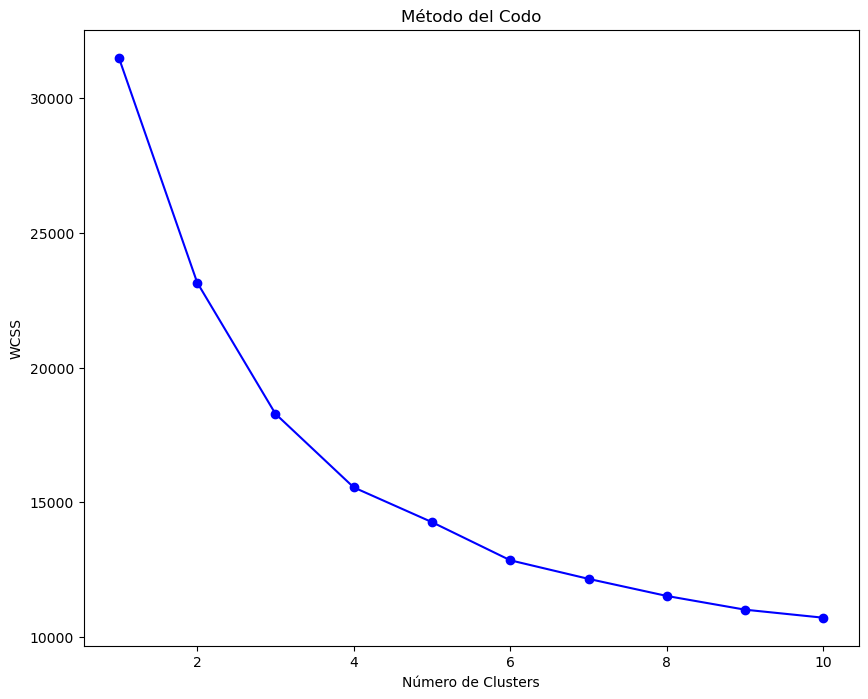

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(range_k, wcss, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()

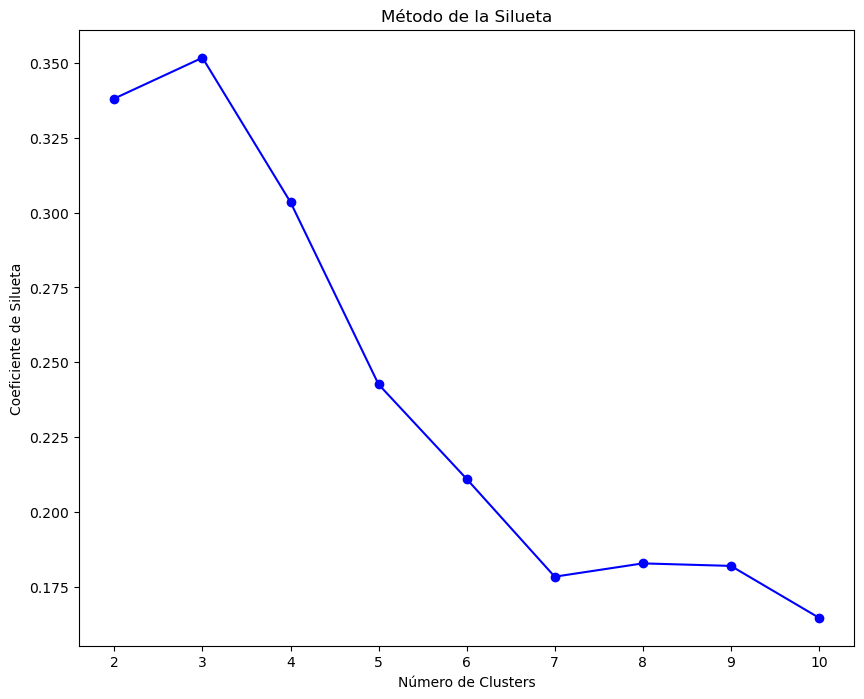

In [5]:
# Método de la Silueta
silhouette_avg = []
for k in range_k[1:]:  # Silhouette score no está definido para k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.figure(figsize=(10, 8))
plt.plot(range_k[1:], silhouette_avg, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de la Silueta')
plt.show()

In [6]:
# Calcular métricas
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
range_k = range(2, 6)
for k in range_k:
    print("Número de clusters: ", k)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(data, cluster_labels)
    db_index = davies_bouldin_score(data, cluster_labels)
    ch_score = calinski_harabasz_score(data, cluster_labels)
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Calinski-Harabasz Score: {ch_score}")

Número de clusters:  2
Inertia: 23163.13485637732
Silhouette Score: 0.33817689366612347
Davies-Bouldin Index: 1.2898523880619173
Calinski-Harabasz Score: 1088.5499812337441
Número de clusters:  3
Inertia: 18287.229084196595
Silhouette Score: 0.3518085589056553
Davies-Bouldin Index: 1.1090396591569374
Calinski-Harabasz Score: 1091.776095280986
Número de clusters:  4
Inertia: 15555.272805608718
Silhouette Score: 0.303504475069559
Davies-Bouldin Index: 1.1368946508220348
Calinski-Harabasz Score: 1032.140323267527
Número de clusters:  5
Inertia: 14264.322863965346
Silhouette Score: 0.24260857298584093
Davies-Bouldin Index: 1.2776749170991746
Calinski-Harabasz Score: 912.1674780036458


## El Silhouette Score 
Es una medida utilizada para evaluar la calidad de los clusters formados en un análisis de clustering. Se calcula para cada punto de datos y luego se promedia para obtener una puntuación general. El valor del Silhouette Score oscila entre -1 y 1:

1 indica que los puntos están bien agrupados y separados claramente de otros clusters.

0 sugiere que los puntos están en el límite de dos clusters.

-1 indica que los puntos pueden haberse asignado al cluster incorrecto.

Un puntaje bajo o negativo sugiere que los clusters están superpuestos y que la distancia entre ellos no es significativa, lo que implica una mala separación.
## Análisis del modelo k-means
El hecho de que el puntaje de Silhouette se mantenga constante y bajo indica que los clusters formados pueden estar superpuestos y que su distancia no es apreciable ni marca una diferencia significativa. Por lo tanto, no se puede considerar este modelo como adecuado para determinar características importantes del problema. En este caso, sería recomendable explorar otros métodos de clustering o ajustar los parámetros del modelo para mejorar la separación de los clusters.
## Modelo DBSCAN
Con respecto a DBSCAN, se probaron diferentes valores de los parámetros eps y min_samples. Sin embargo, todos los intentos logran identificar un único cluster, lo cual impide apreciar características similares entre diferentes grupos.
El hecho de que DBSCAN identifique un único cluster puede deberse a varios factores:

* Estandarización: Si los datos están muy unidos o compactos, DBSCAN puede interpretarlo como un solo cluster. La estandarización puede ayudar a mejorar la separación, pero si los datos son intrínsecamente muy similares, puede que no sea suficiente.
* Naturaleza de los Datos: Si el dataset contiene únicamente datos de siniestros exitosos y no otros tipos de eventos, puede que no haya suficiente variabilidad para formar múltiples clusters.
* Datos Categóricos: DBSCAN funciona mejor con datos continuos. Si el dataset contiene muchas variables categóricas, esto puede afectar su capacidad para identificar clusters densos y separados.

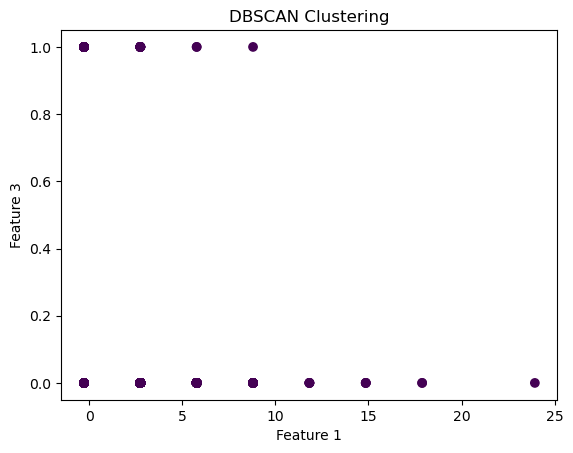

In [7]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1000)
cluster_labels = dbscan.fit_predict(data)

# Visualizar resultados
plt.scatter(data["NUM_FALLECIDO"], data["PROVINCIA_2"], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('DBSCAN Clustering')
plt.show()

## Agglomerative Clustering
Por último, se encuentra el algoritmo de Agglomerative Clustering, el cual es un método de clustering jerárquico. En este caso, se obtuvieron métricas exitosas en diferentes pruebas, principalmente en el índice de Silhouette. Este índice mejoró significativamente cuando se utilizaron combinaciones específicas de parámetros, lo que indica una mejor formación de clusters.

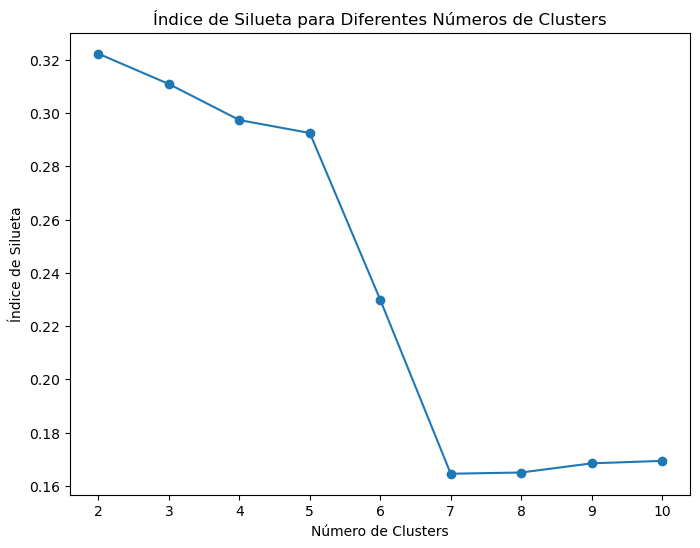

In [8]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = clustering.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta para Diferentes Números de Clusters')
plt.show()

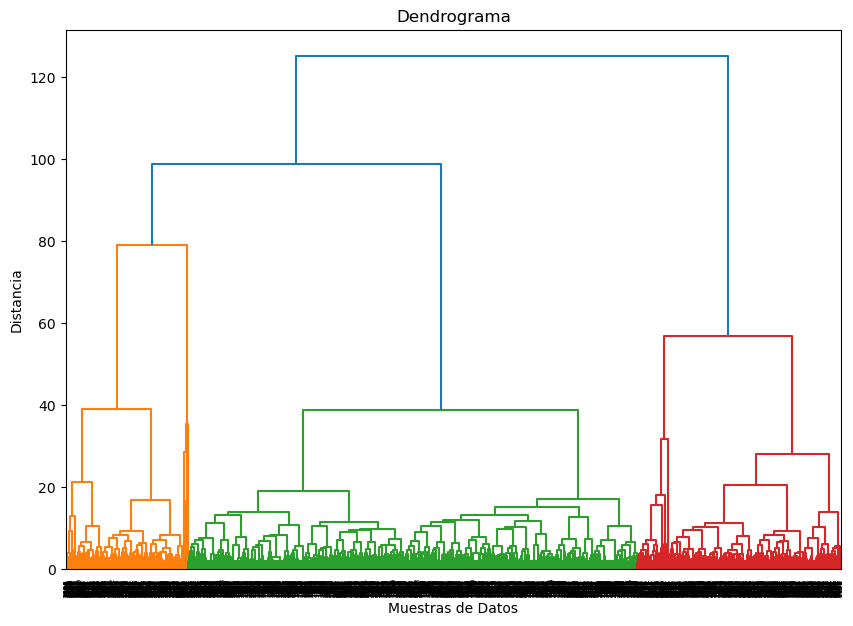

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Muestras de Datos')
plt.ylabel('Distancia')
plt.title('Dendrograma')
plt.show()

## Prueba para parámetros
Dado el análisis anterior y la distribución de datos, se probaron los siguientes conjuntos de posibilidades, donde el tipo de enlace es un factor importante:

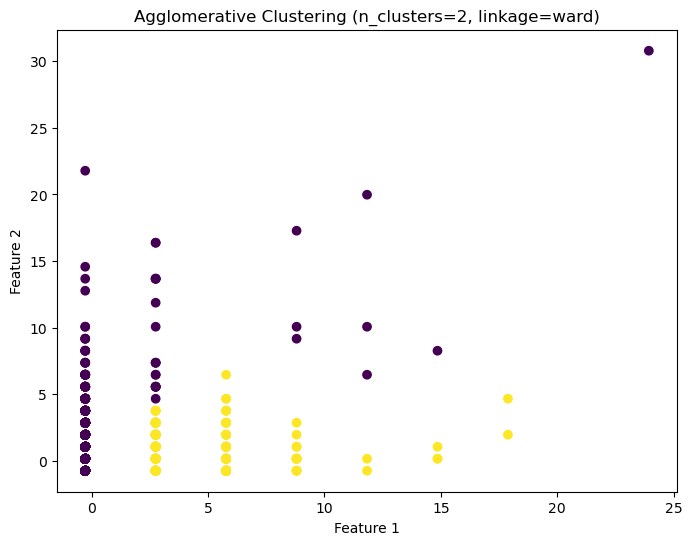

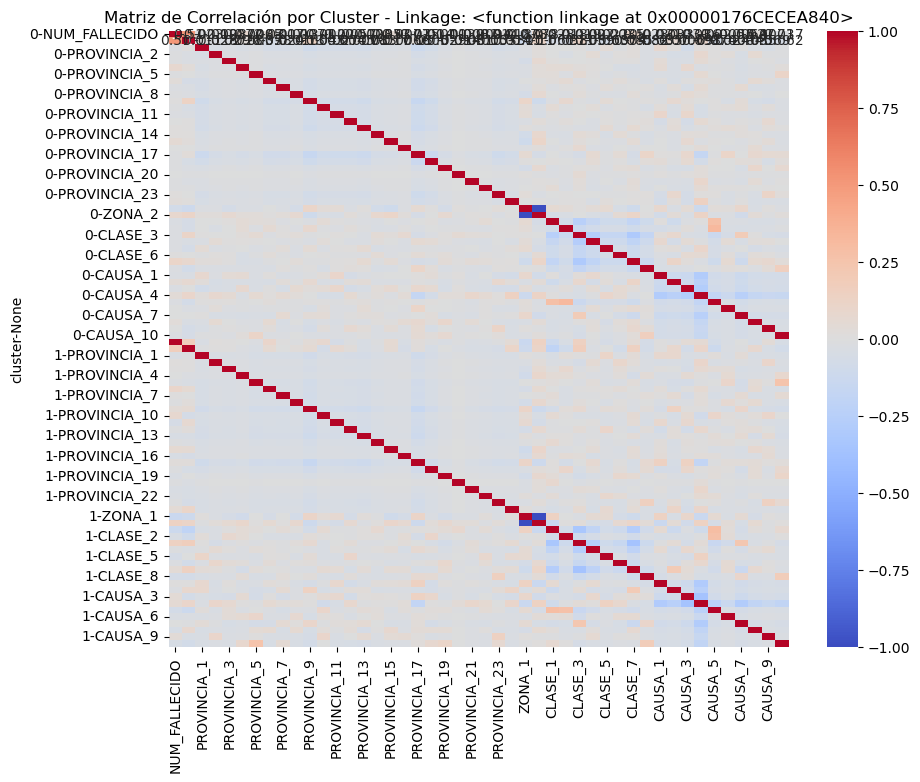

Silhouette Score (n_clusters=2, linkage=ward): 0.32230630462732135


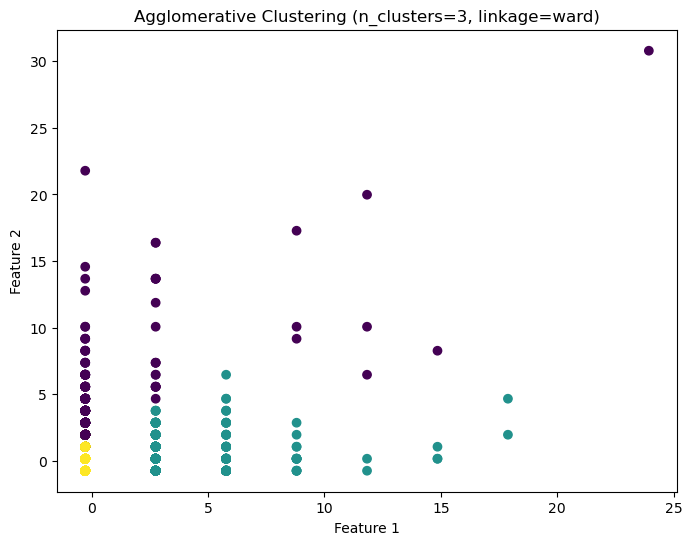

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


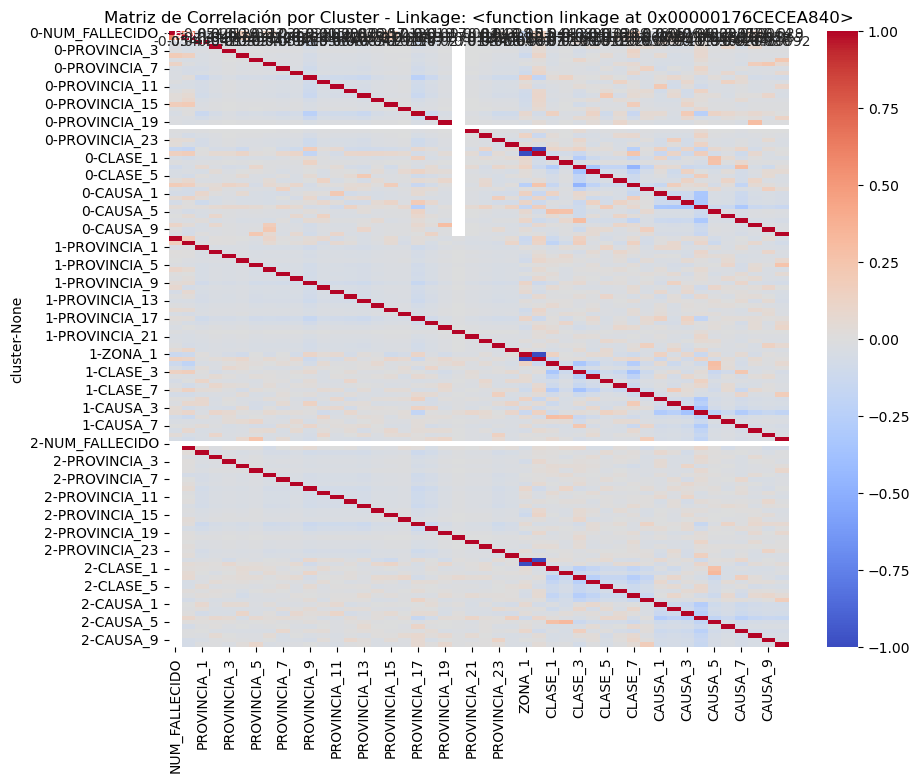

Silhouette Score (n_clusters=3, linkage=ward): 0.3109121674847656


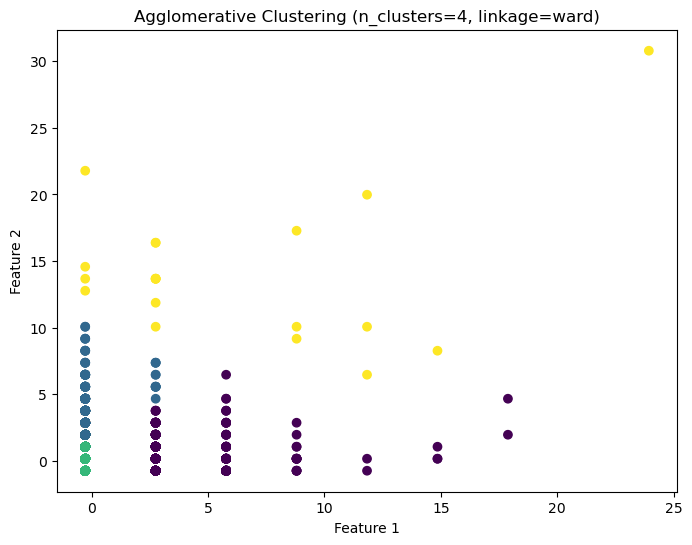

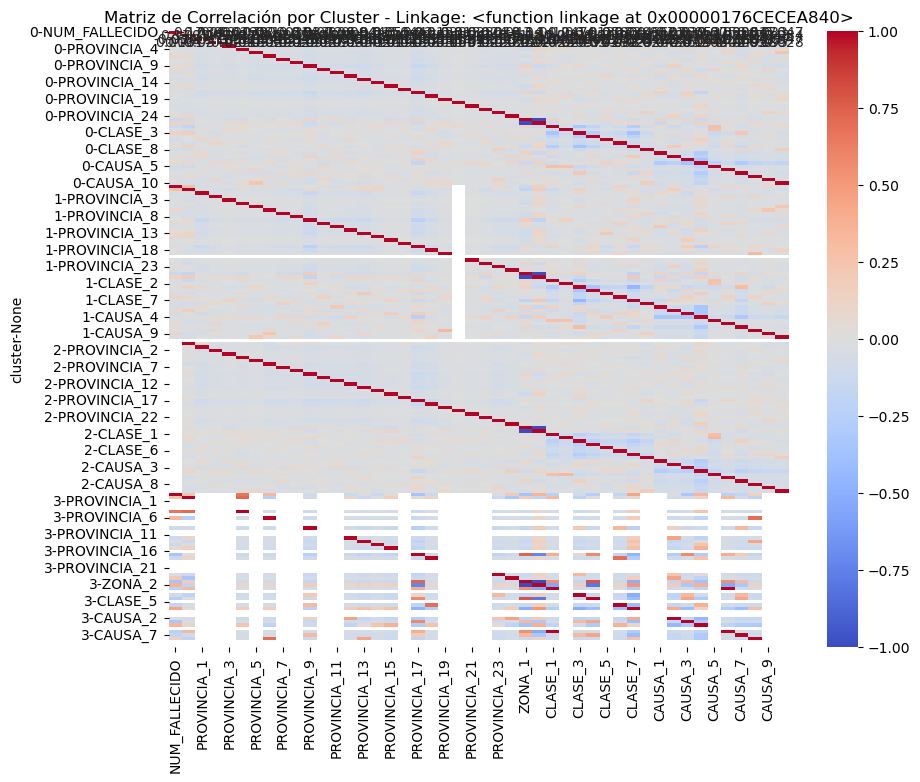

Silhouette Score (n_clusters=4, linkage=ward): 0.29739274393419796


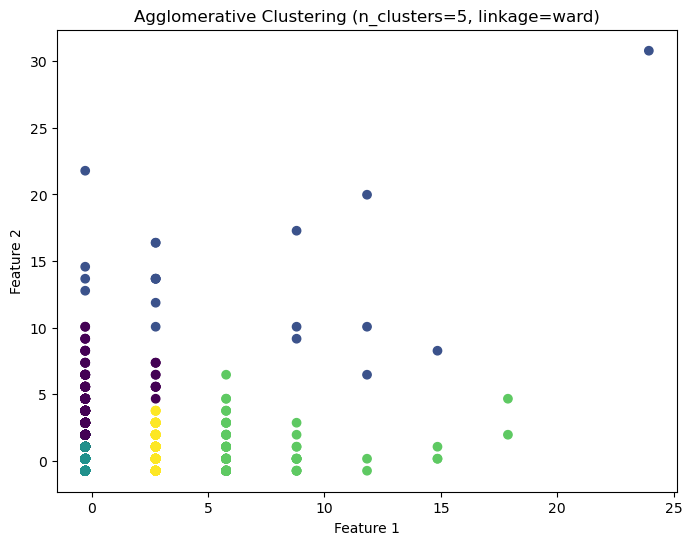

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


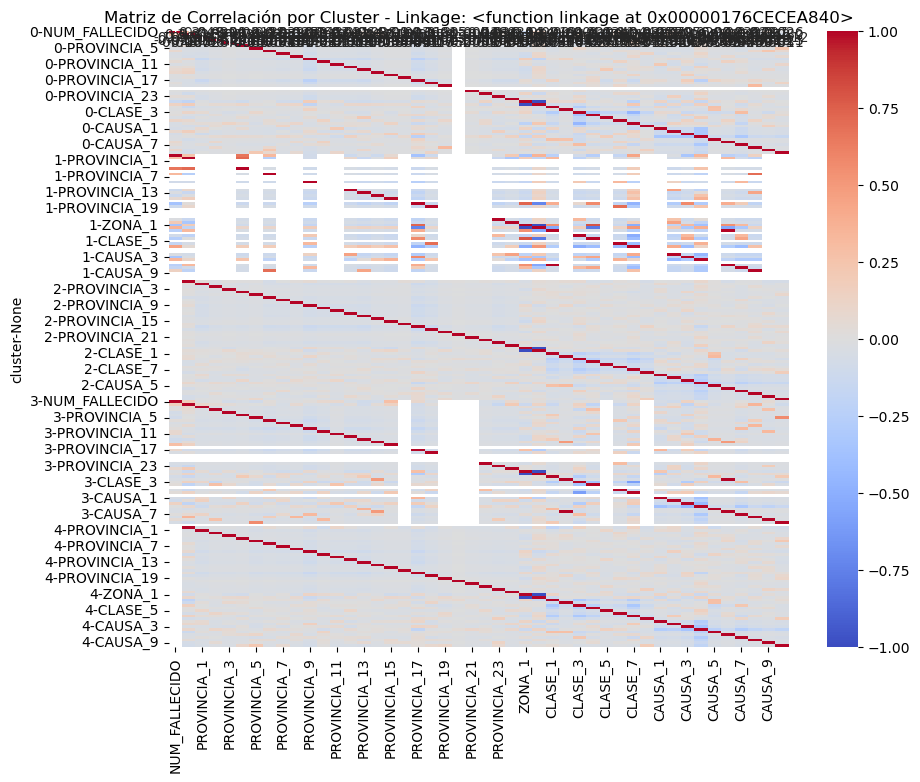

Silhouette Score (n_clusters=5, linkage=ward): 0.2925215746806908


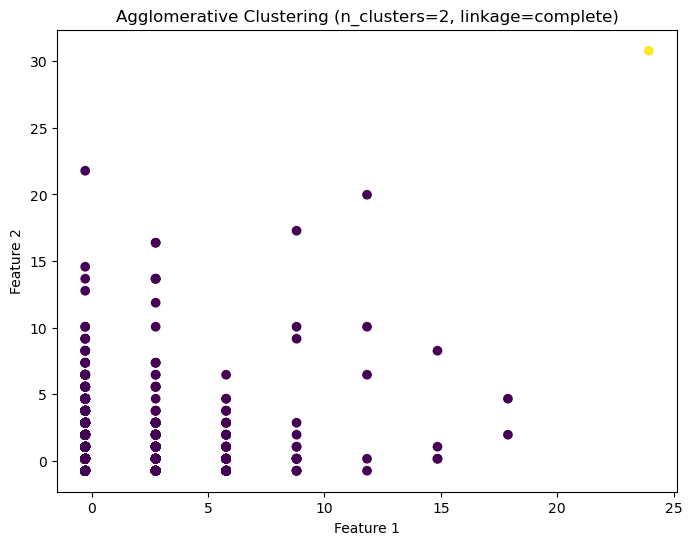

Silhouette Score (n_clusters=2, linkage=complete): 0.8942249598495652


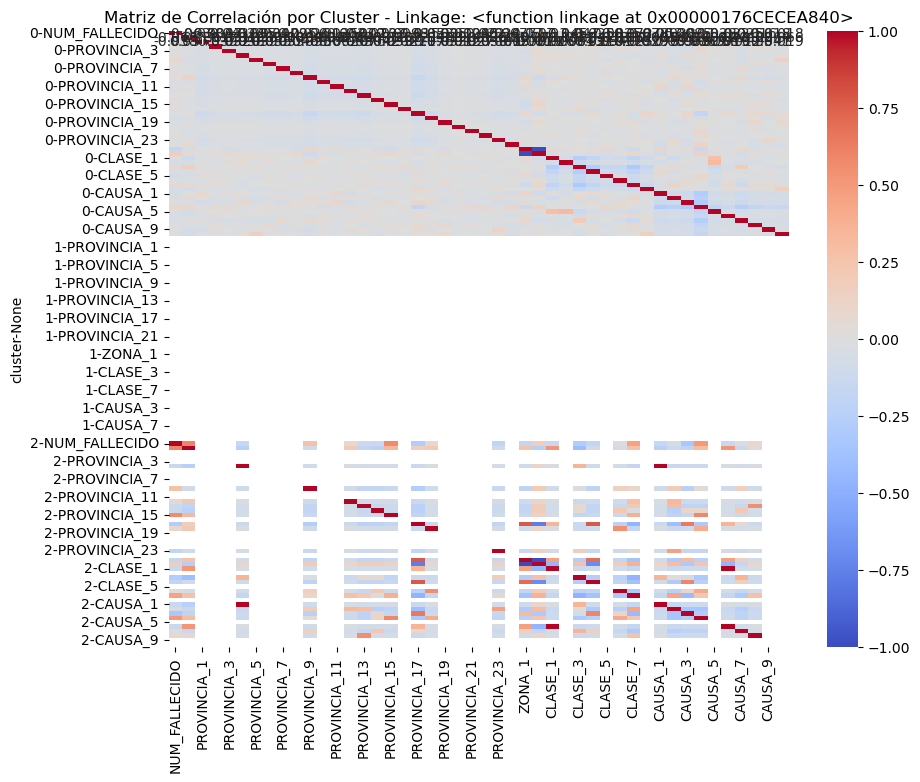

Silhouette Score (n_clusters=3, linkage=complete): 0.6940680748506497


C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Silhouette Score (n_clusters=4, linkage=complete): 0.6871384472154993


C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Silhouette Score (n_clusters=5, linkage=complete): 0.6593826644252305


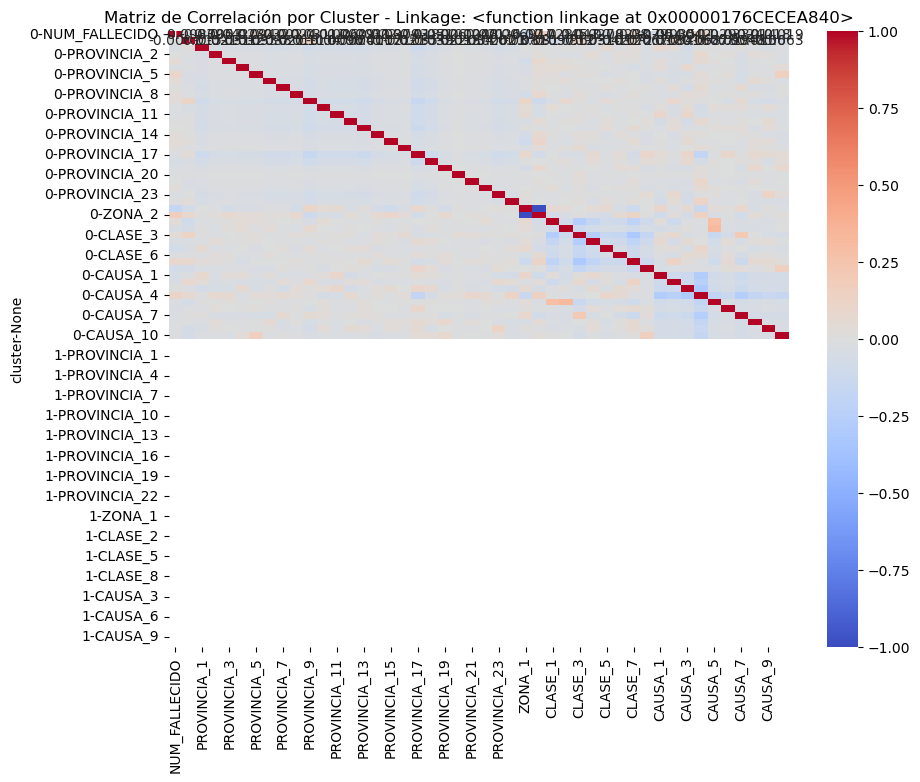

Silhouette Score (n_clusters=2, linkage=average): 0.8942249598495652


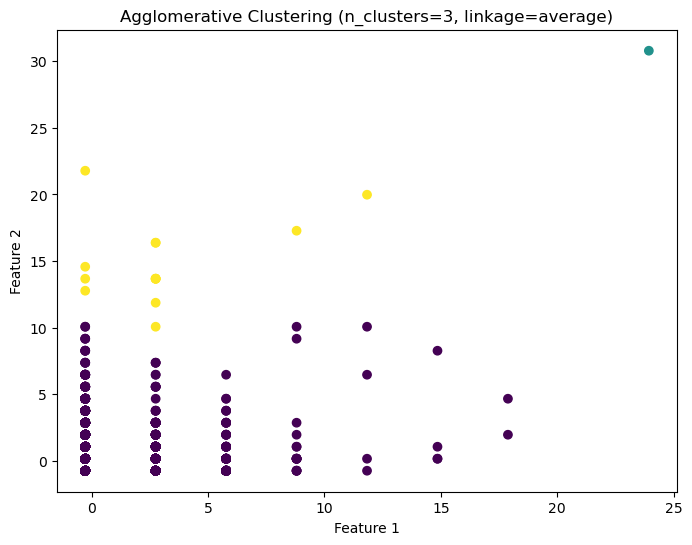

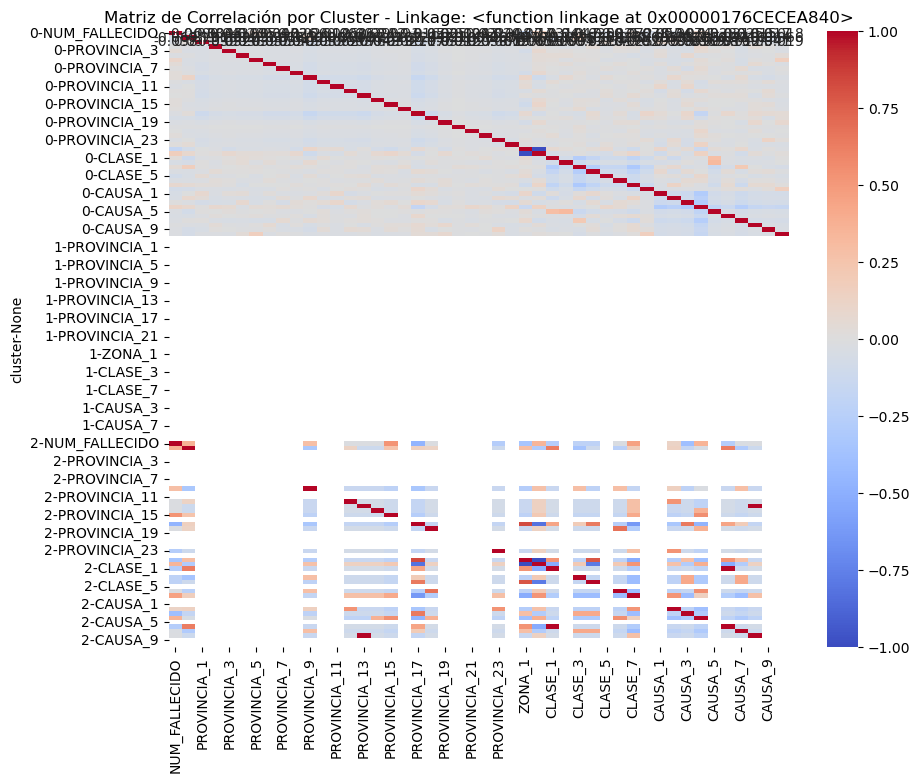

Silhouette Score (n_clusters=3, linkage=average): 0.7403128993951934


C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Silhouette Score (n_clusters=4, linkage=average): 0.7171326439252308


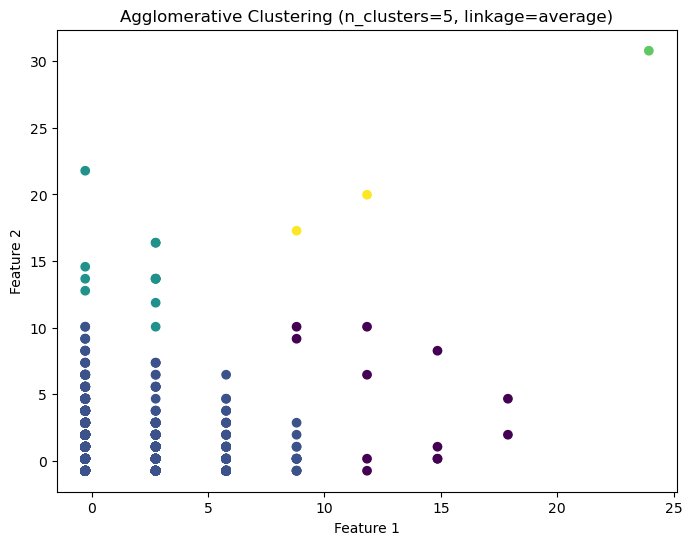

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


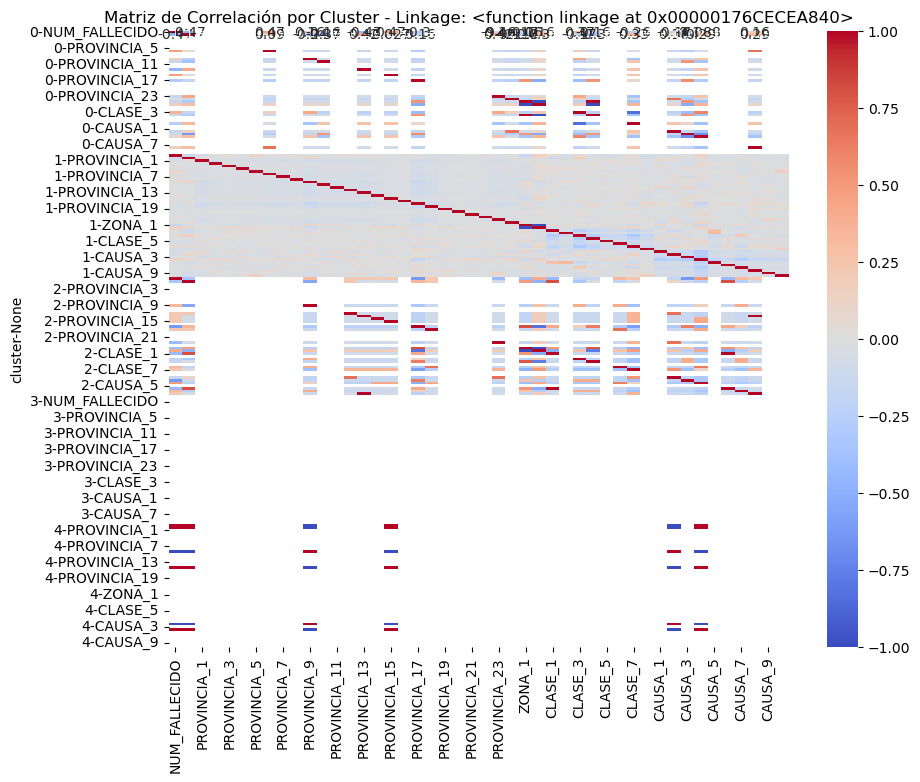

Silhouette Score (n_clusters=5, linkage=average): 0.707993353725453


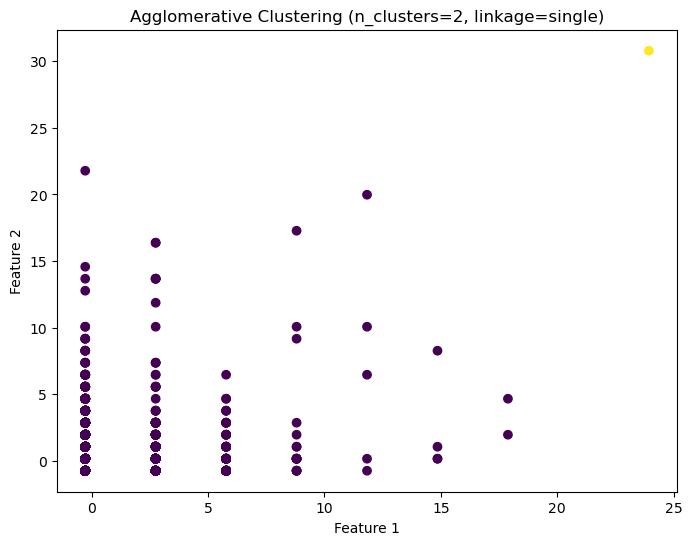

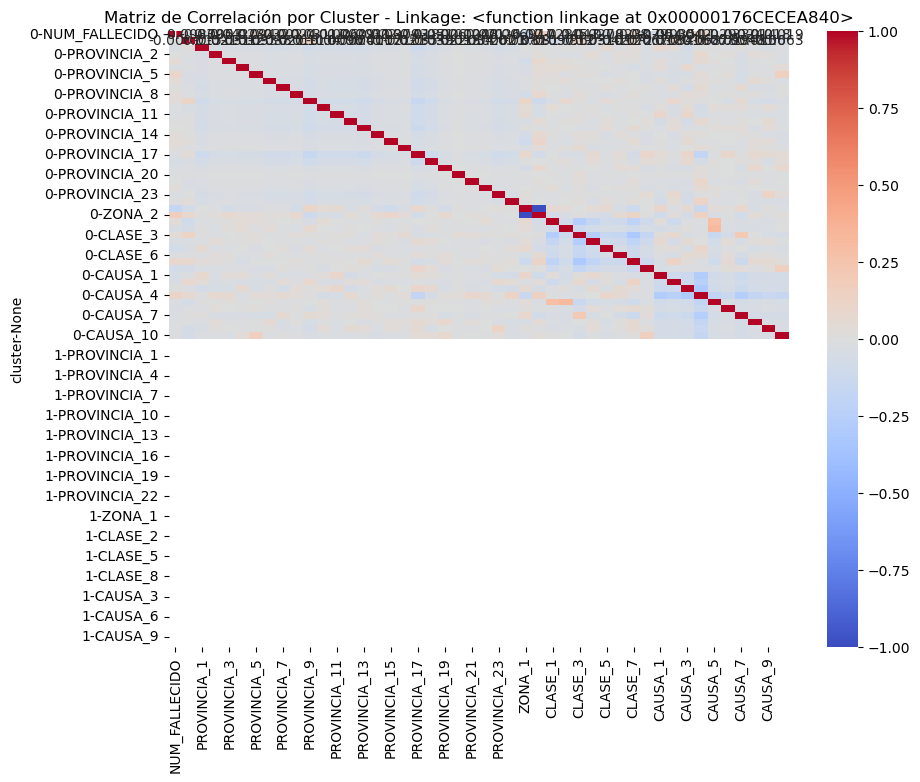

Silhouette Score (n_clusters=2, linkage=single): 0.8942249598495652


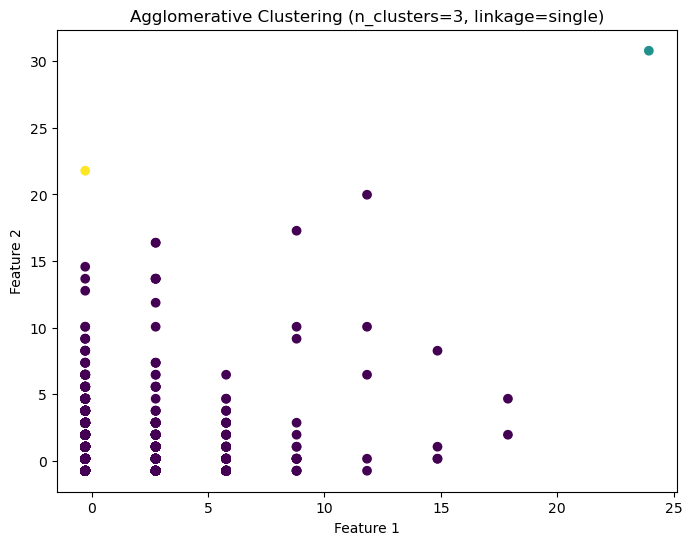

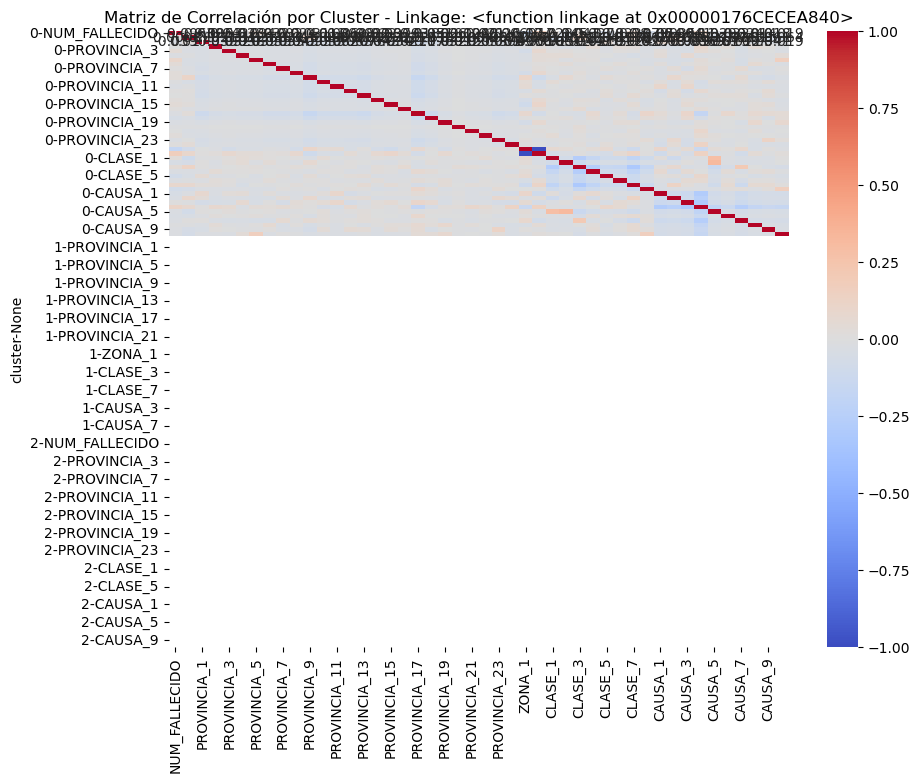

Silhouette Score (n_clusters=3, linkage=single): 0.8111092236224727


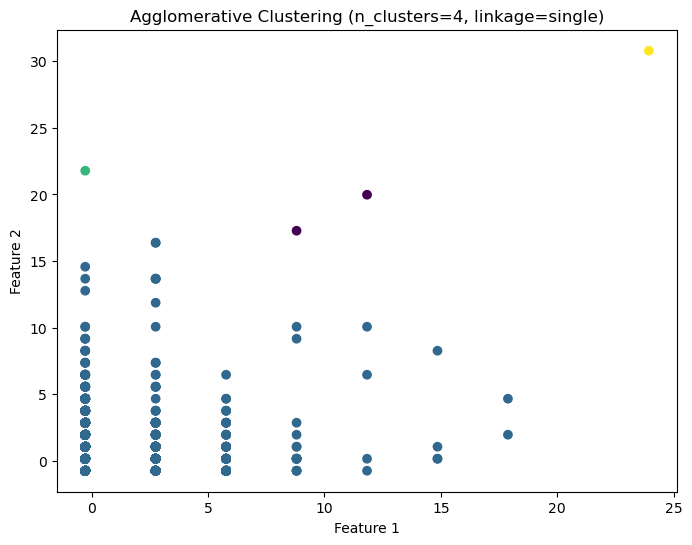

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


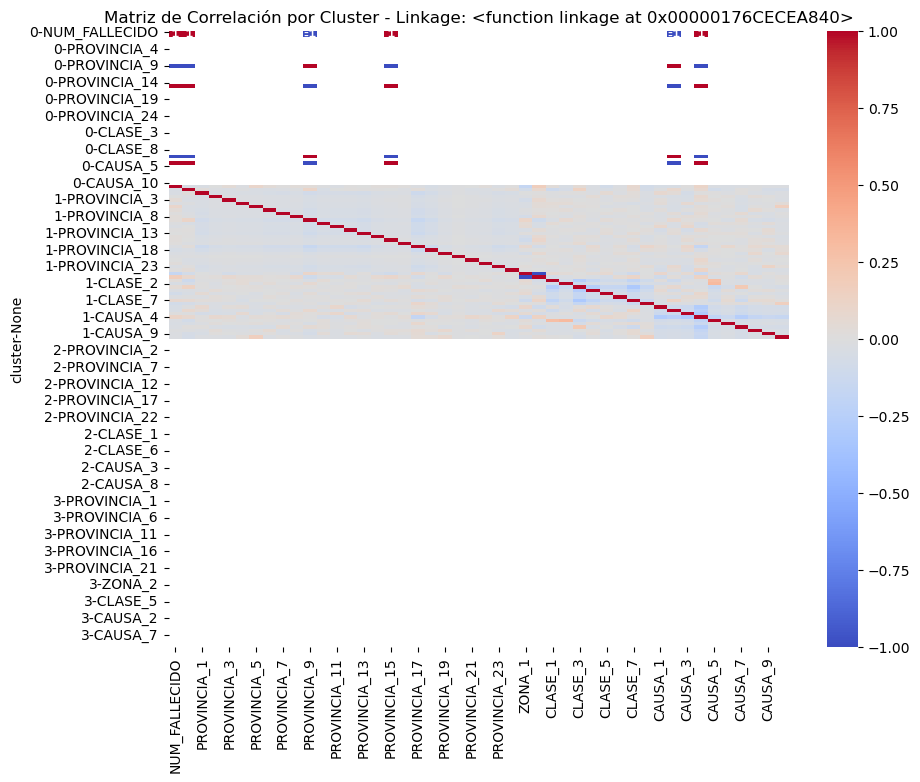

Silhouette Score (n_clusters=4, linkage=single): 0.8035039941585164


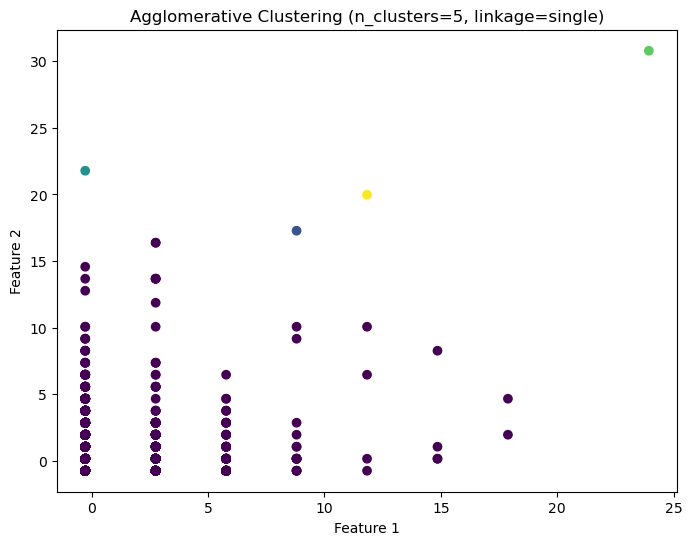

Silhouette Score (n_clusters=5, linkage=single): 0.7842322329971974


In [10]:
import seaborn as sns

n_clusters_list = [2, 3, 4, 5]
linkage_types = ['ward', 'complete', 'average', 'single']

for linkage_type in linkage_types:
    for n_clusters in n_clusters_list:
        # Aplicar Agglomerative Clustering
        agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_type)
        cluster_labels = agg_cluster.fit_predict(data)

        # Visualización de los clusters
        plt.figure(figsize=(8, 6))
        plt.scatter(data["NUM_FALLECIDO"], data["NUM_LESIONADO"], c=cluster_labels, cmap='viridis')
        plt.title(f'Agglomerative Clustering (n_clusters={n_clusters}, linkage={linkage_type})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

        #Correlación
        data_clus = data.copy()
        data_clus['cluster'] = cluster_labels

        # Calcular la matriz de correlación para los clusters
        cluster_corr = data_clus.groupby('cluster').corr()

        # Visualización de matrices de correlación
        plt.figure(figsize=(10, 8))
        sns.heatmap(cluster_corr, annot=True, cmap='coolwarm')
        plt.title(f'Matriz de Correlación por Cluster - Linkage: {linkage}')
        plt.show()

        # Índice de Silueta
        silhouette = silhouette_score(data, cluster_labels)
        print(f"Silhouette Score (n_clusters={n_clusters}, linkage={linkage_type}): {silhouette}")

## Modelo descripción 
Dado la observación de las gráficas según las primeras características, se observa que las siguientes combinaciones son aproximaciones buenas a un modelo de clustering:

Silhouette Score (n_clusters=5, linkage=average): 0.707993353725453
Silhouette Score (n_clusters=4, linkage=average): 0.71713264392523083

Silhouette Score (n_clusters=3, linkage=complete): 0.74598795289244783

## Análisis de Combinaciones
Existe combinaciones que llegan a un 80 y 90, sin embargo, según su gráfica muestra comportamientos de caracterización de anomalías. En este contexto, no se buscan anomalías sino relaciones entre el cluster y factores independientes como la provincia y causa. Dado esto, se seleccionan los parámetros n = 3 y tipo de enlace = average.

## Evaluación
Precedentemente a esto, se realiza una evaluación del modelo. En contexto, se requiere poder identificar patrones comunes en los incidentes, y una buena señal del modelo es que separa los clusters según la cantidad de víctimas

In [11]:
#Silhouette Score (n_clusters=5, linkage=average): 0.728686153151029
#Silhouette Score (n_clusters=4, linkage=average): 0.7432214893254673
#Silhouette Score (n_clusters=3, linkage=complete): 0.745987952892447
#Silhouette Score (n_clusters=3, linkage=average): 0.7729563242828283

agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='average')
cluster_labels = agg_cluster.fit_predict(data)

# Agregar las etiquetas de cluster al DataFrame
data_clus = data.copy()
data_clus['cluster'] = cluster_labels
cluster_profiles = data_clus.groupby('cluster').mean()
print(cluster_profiles)

         NUM_FALLECIDO  NUM_LESIONADO  PROVINCIA_1  PROVINCIA_2  PROVINCIA_3  \
cluster                                                                        
0             0.710718       0.494851     0.065492     0.021609     0.014628   
1            23.931699      30.788160     0.000000     0.000000     0.000000   
2             2.965067      14.959026     0.000000     0.000000     0.000000   

         PROVINCIA_4  PROVINCIA_5  PROVINCIA_6  PROVINCIA_7  PROVINCIA_8  ...  \
cluster                                                                   ...   
0           0.020279     0.020944     0.041223     0.041556      0.02859  ...   
1           1.000000     0.000000     0.000000     0.000000      0.00000  ...   
2           0.000000     0.000000     0.000000     0.000000      0.00000  ...   

          CAUSA_1   CAUSA_2   CAUSA_3   CAUSA_4   CAUSA_5   CAUSA_6   CAUSA_7  \
cluster                                                                         
0        0.113032  0.082779  0.

Como se observa en este pequeño resumen, las primeras características están separando los clusters, ya que su media difiere en gran cantidad.

In [12]:
print(cluster_profiles.columns)

Index(['NUM_FALLECIDO', 'NUM_LESIONADO', 'PROVINCIA_1', 'PROVINCIA_2',
       'PROVINCIA_3', 'PROVINCIA_4', 'PROVINCIA_5', 'PROVINCIA_6',
       'PROVINCIA_7', 'PROVINCIA_8', 'PROVINCIA_9', 'PROVINCIA_10',
       'PROVINCIA_11', 'PROVINCIA_12', 'PROVINCIA_13', 'PROVINCIA_14',
       'PROVINCIA_15', 'PROVINCIA_16', 'PROVINCIA_17', 'PROVINCIA_18',
       'PROVINCIA_19', 'PROVINCIA_20', 'PROVINCIA_21', 'PROVINCIA_22',
       'PROVINCIA_23', 'PROVINCIA_24', 'ZONA_1', 'ZONA_2', 'CLASE_1',
       'CLASE_2', 'CLASE_3', 'CLASE_4', 'CLASE_5', 'CLASE_6', 'CLASE_7',
       'CLASE_8', 'CAUSA_1', 'CAUSA_2', 'CAUSA_3', 'CAUSA_4', 'CAUSA_5',
       'CAUSA_6', 'CAUSA_7', 'CAUSA_8', 'CAUSA_9', 'CAUSA_10'],
      dtype='object')


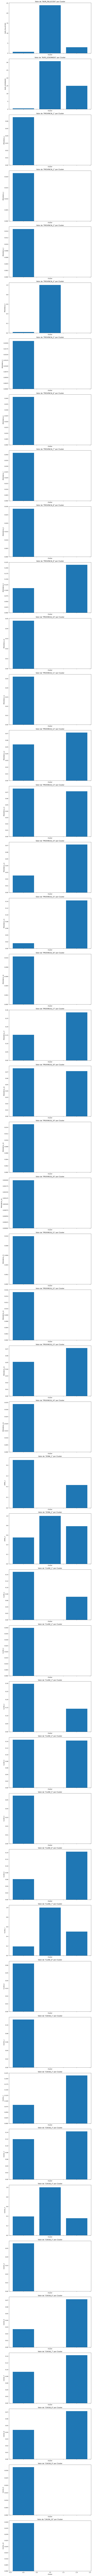

In [13]:
features = cluster_profiles.columns.tolist()

# Crear gráficos de barras para cada característica
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 6*num_features), sharex=True)

for i, feature in enumerate(features):
    ax = axes[i]
    ax.bar(cluster_profiles.index, cluster_profiles[feature])
    ax.set_ylabel(feature)
    ax.set_xlabel('Cluster')
    ax.set_title(f'Valor de "{feature}" por Cluster')

plt.tight_layout()
plt.show()

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


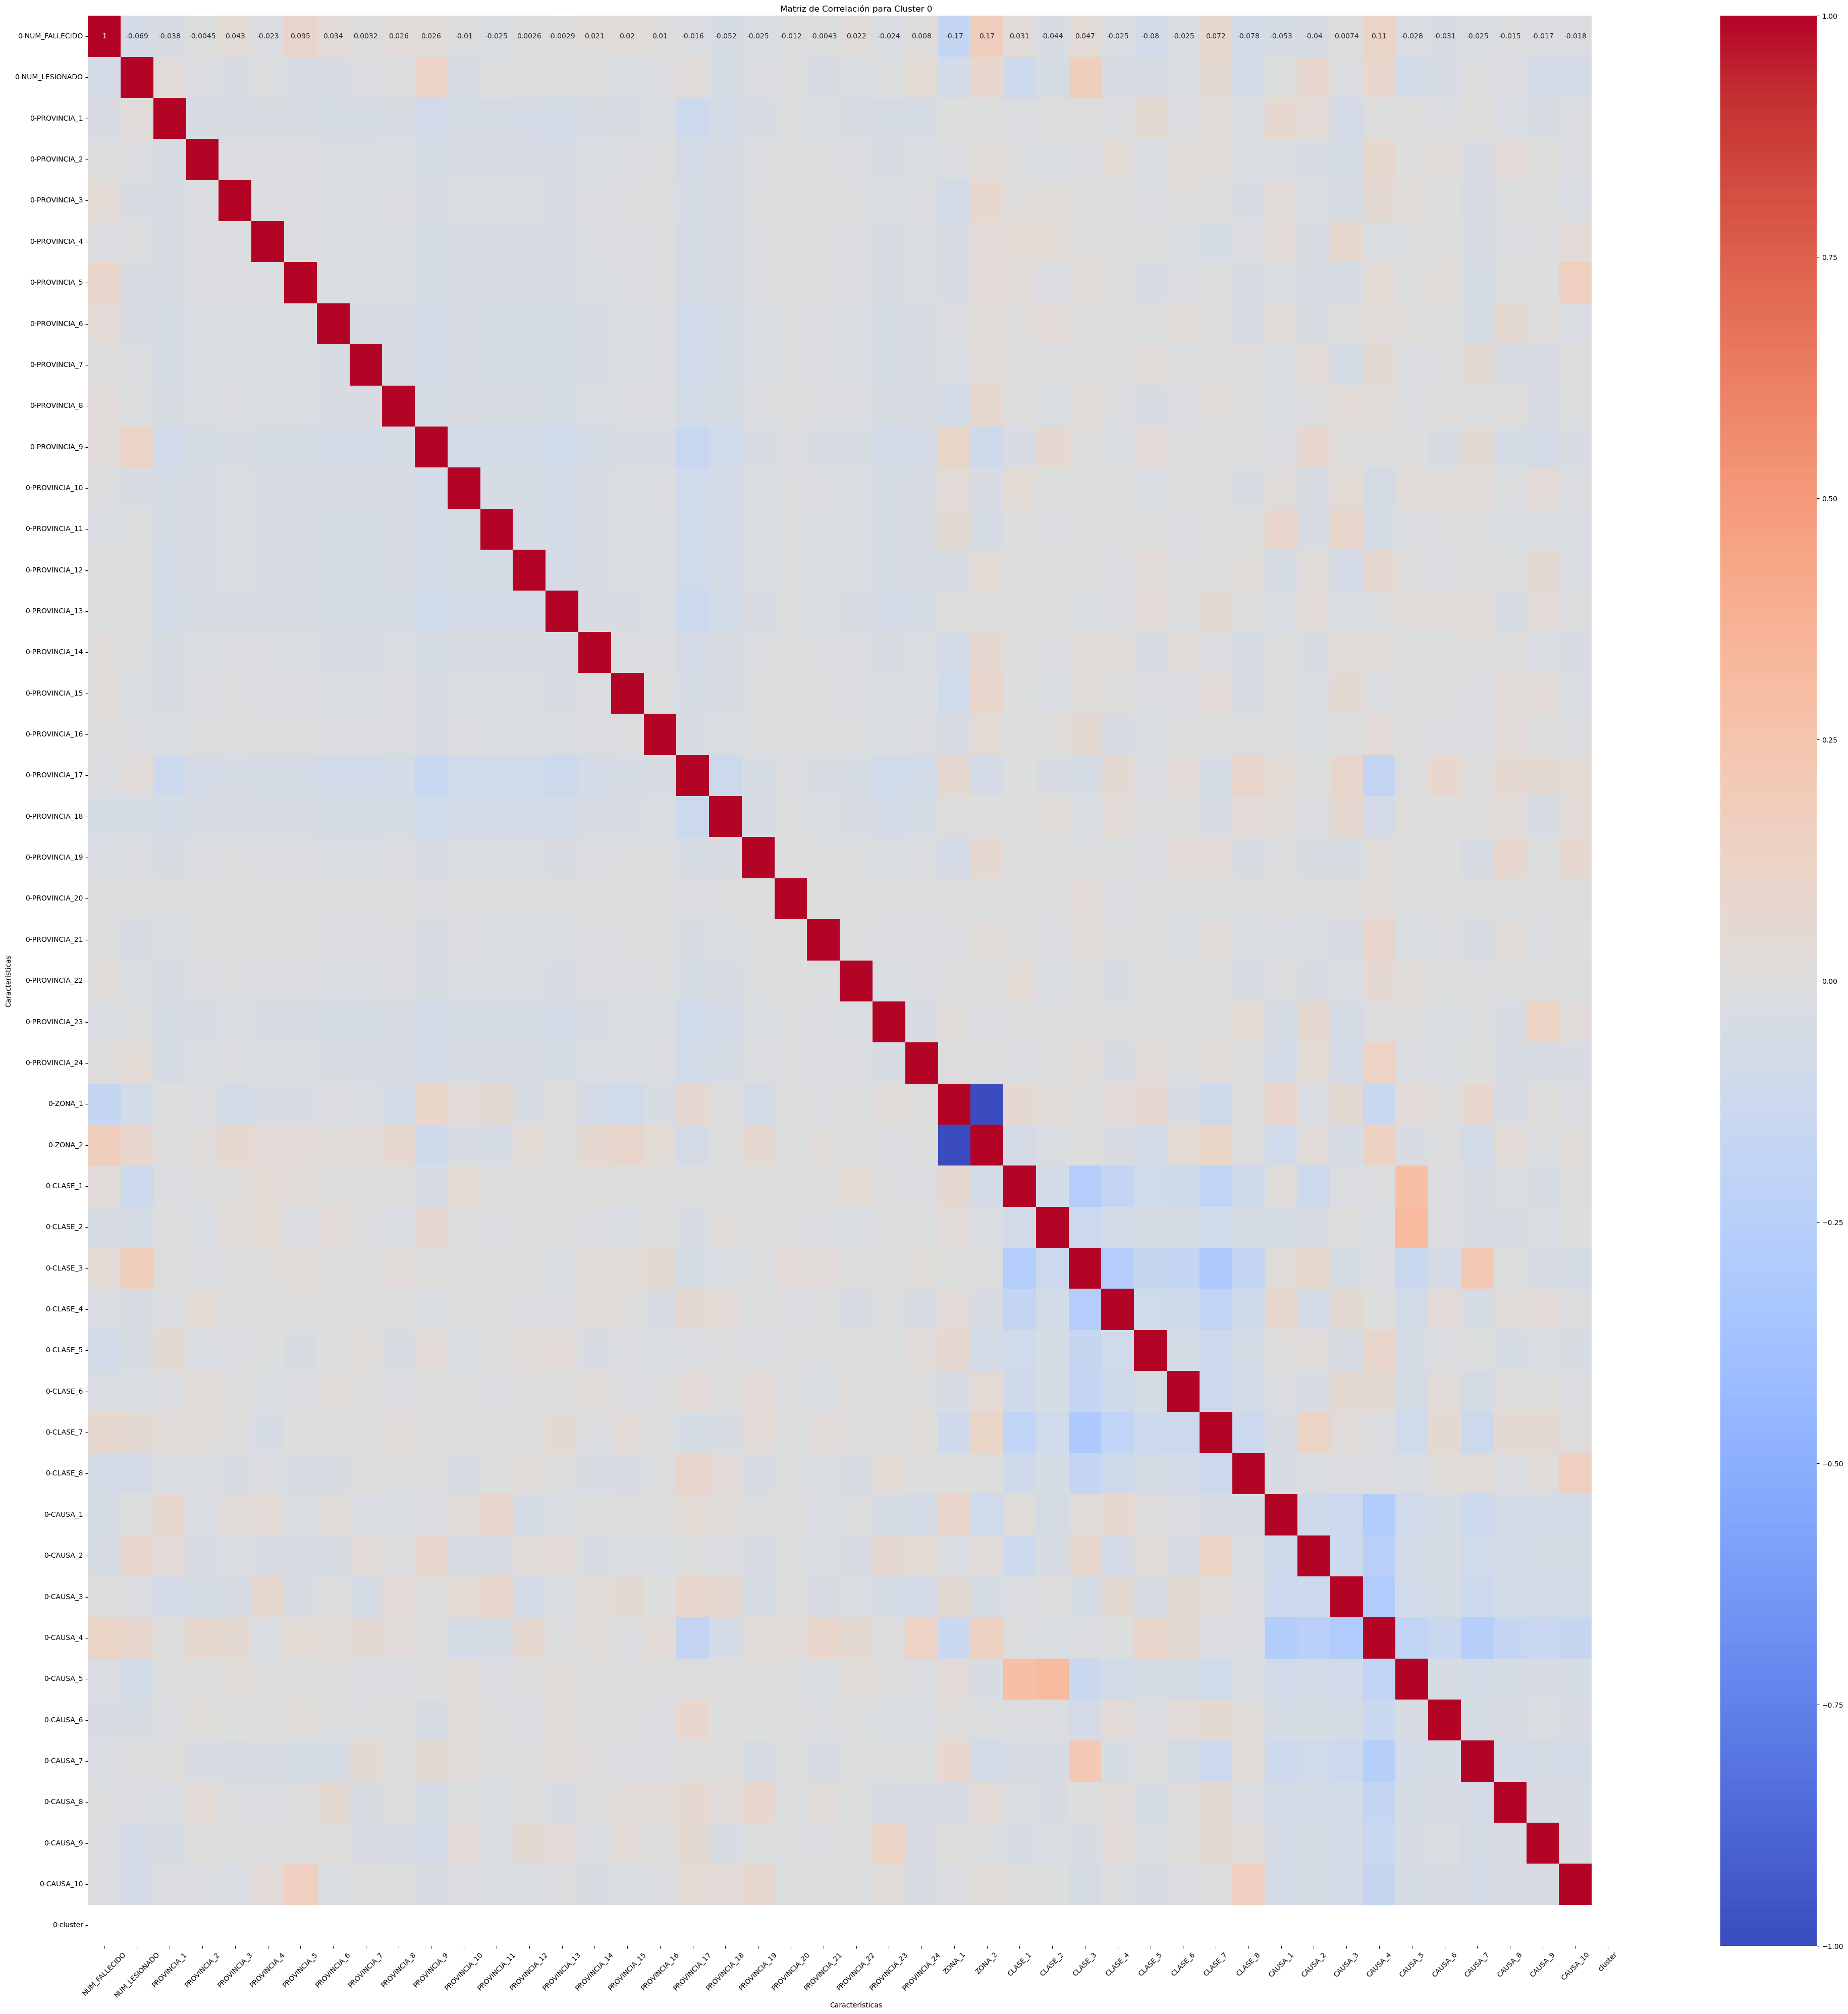

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


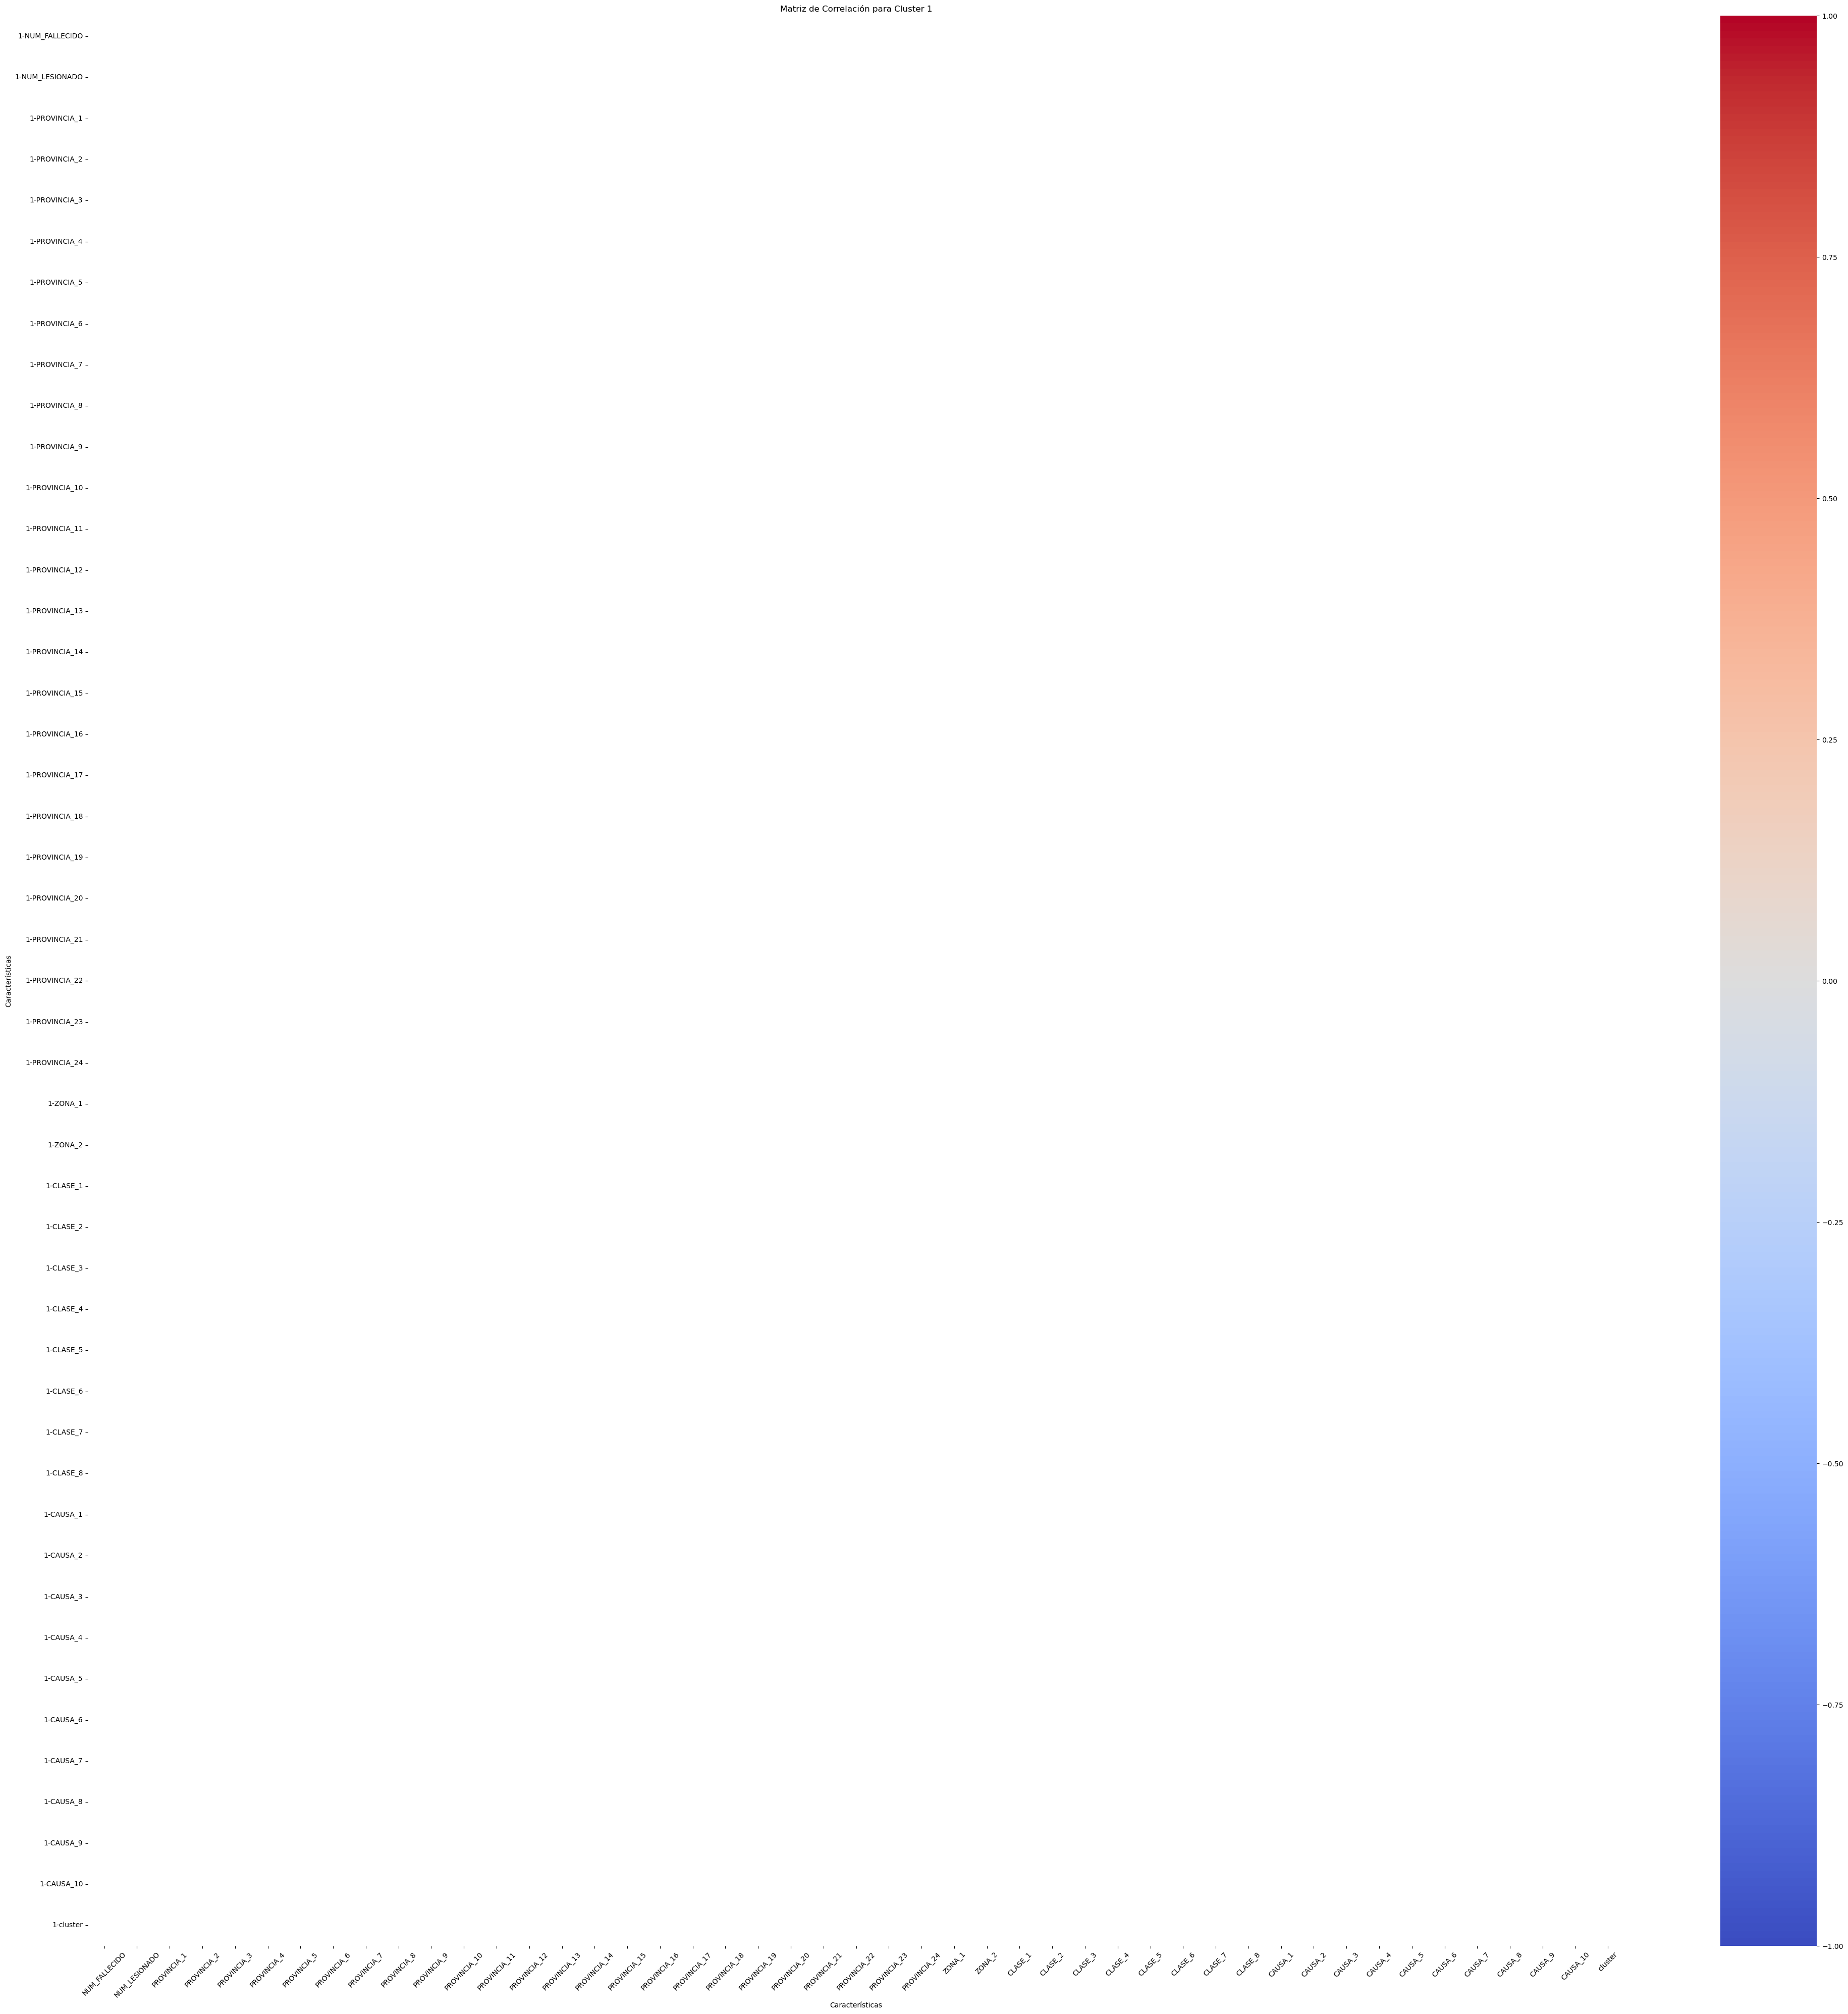

C:\Users\luisc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


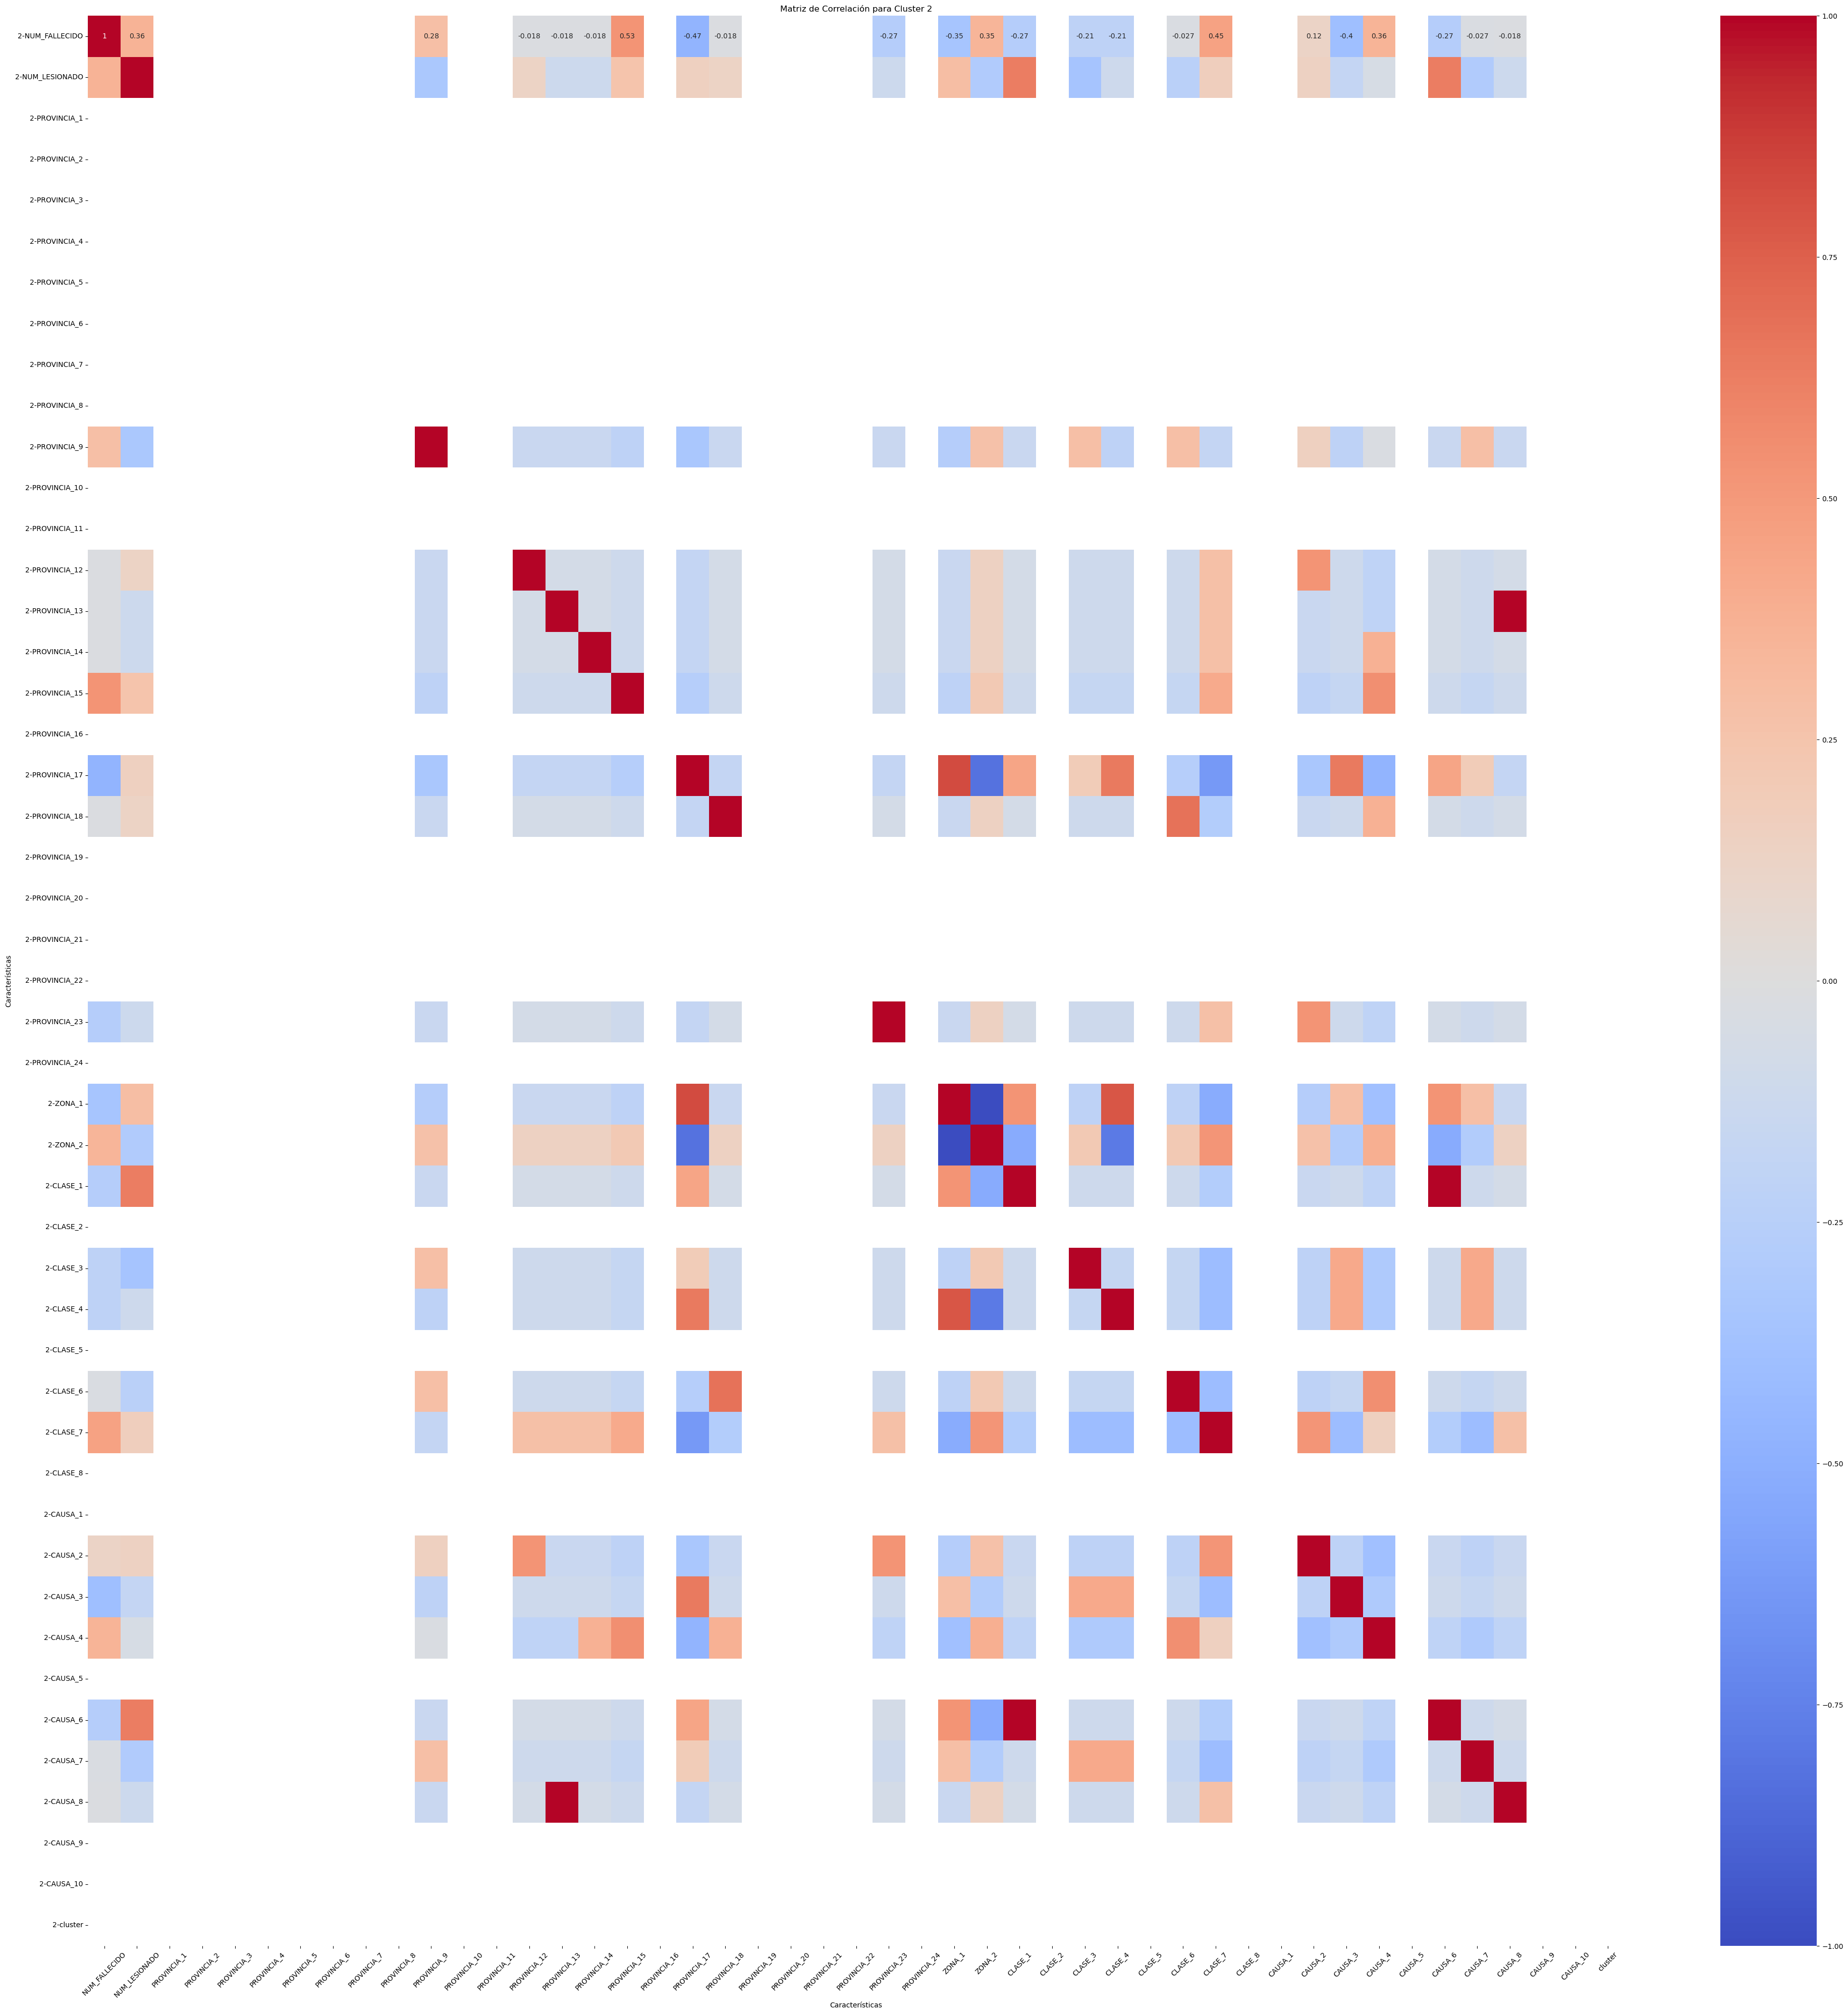

In [15]:
cluster_corr = data_clus.groupby('cluster').apply(lambda x: x.corr())

# Visualización de matrices de correlación por cluster
for cluster, corr_matrix in cluster_corr.groupby(level=0):
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación para Cluster {cluster}')
    plt.xlabel('Características')
    plt.ylabel('Características')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

Por último, se observa una matriz de correlación entre las variables para cada cluster formado. En el primer cluster, se interpreta que existen accidentes sin correlación directa; este cluster parece representar incidentes sin víctimas en general. Por otro lado, el segundo cluster muestra características anómalas, probablemente debido a ruido en los datos. Finalmente, nos enfocaremos en el tercer cluster para analizar características específicas de incidentes. En este cluster, se observa que ciertas provincias están correlacionadas con el número de fallecidos o lesionados, así como la clase del incidente con la provincia y la causa. Este análisis será explorado con más detalle en la evaluación y análisis posterior.